<a href="https://colab.research.google.com/github/thoufiqz55/Python/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [5]:
#Reading the file
SeoulBikeData = pd.read_csv("SeoulBikeData.csv")

In [6]:
#Printing the dimension
print("Dimension of bike dataset", SeoulBikeData.shape)

Dimension of bike dataset (8760, 14)


In [7]:
#Printing first 5 dataset
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
# Extracting dataframe for only 'number' datatypes
df = SeoulBikeData.select_dtypes(include=['float64', 'int64'])
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [9]:
# Showing datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


In [10]:
#Identifing missing Values
miss_val = df.isna().sum()
miss_val

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
dtype: int64

In [11]:
# Identifing missing Values > 0 and sorting them by ascending order
miss_val[miss_val>0].sort_values(ascending = False)


Series([], dtype: int64)

In [12]:
#data set columns
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [13]:
df.isna().sum()

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
dtype: int64

In [14]:
df_SeoulBikeData = df[:]

In [19]:
#Constructing correlation Matrix
df_corr = df.corr()
df_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


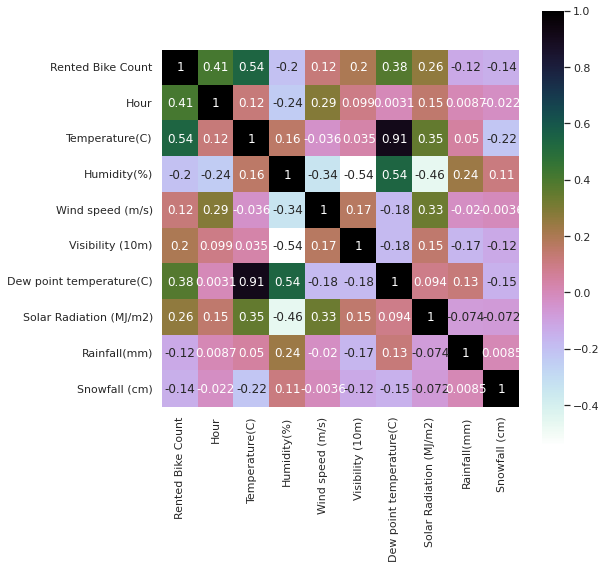

In [16]:
#Plotting the graph
plt.figure(figsize=(8,8))
sns.heatmap(data_corr, annot=True, cmap='cubehelix_r', square=True)
plt.show()

In [20]:
data_corr = df_corr['Rented Bike Count'][:-1]
data_corr[abs(data_corr)>=0.20].sort_values(ascending = True)

Solar Radiation (MJ/m2)     0.261837
Dew point temperature(C)    0.379788
Hour                        0.410257
Temperature(C)              0.538558
Rented Bike Count           1.000000
Name: Rented Bike Count, dtype: float64

In [21]:
data_corr

Rented Bike Count           1.000000
Hour                        0.410257
Temperature(C)              0.538558
Humidity(%)                -0.199780
Wind speed (m/s)            0.121108
Visibility (10m)            0.199280
Dew point temperature(C)    0.379788
Solar Radiation (MJ/m2)     0.261837
Rainfall(mm)               -0.123074
Name: Rented Bike Count, dtype: float64

Creating Variable with columns

In [22]:
x = df.drop(['Rented Bike Count'], axis=1)
y = df['Rented Bike Count']

In [23]:
#Splitting dataset for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.20)


In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [25]:
mode_pred=model.predict(X_test)

In [26]:
model_score=model.score(X_test,Y_test)
print(model_score)

0.4727017342686437


In [28]:
#Ridge and Lasso for Incresing the Accuracy

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, Y_train)
ridge_score = ridge.score(X_test, Y_test)
print("accuracy using ridge: ", ridge_score)

accuracy using ridge:  0.47270153650099056


In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, Y_train)
lasso_score = lasso.score(X_test, Y_test)
print("accuracy using lasso: ", lasso_score)

accuracy using lasso:  0.4726228988266652
